# DAT405 Assignment 2 -- Shivneshwar Velayutham

## Problem 1


In [392]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [393]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = pd.read_csv("data_assignment2.csv")

### Problem 1a)

Below is the code that implements linear regression on the data. 


In [394]:
# Fitting linear regression model on data
linear_model = ols('Selling_price ~ Living_area', data=df).fit()

### Problem 1b)

The intercept and slope on the model is printed below. 


In [395]:
print('Intercept: {0} Slope: {1}'.format(linear_model.params[0], linear_model.params[1]))

Intercept: 2220603.243355871 Slope: 19370.138547331568


### Problem 1c)

Prediction of selling prices for below input data printed in the dictionary below. 


In [396]:
inp = [100, 150, 200]
df_new = pd.DataFrame({'Living_area': inp})

# Predicting results on above data on the fitted model
op = linear_model.predict(df_new).values
res = dict(map(lambda i,j : (i,j) , inp, op))
print(res)

{100: 4157617.098089028, 150: 5126124.025455606, 200: 6094630.952822185}


### Problem 1d)

Residual plot drawn below.


eval_env: 1


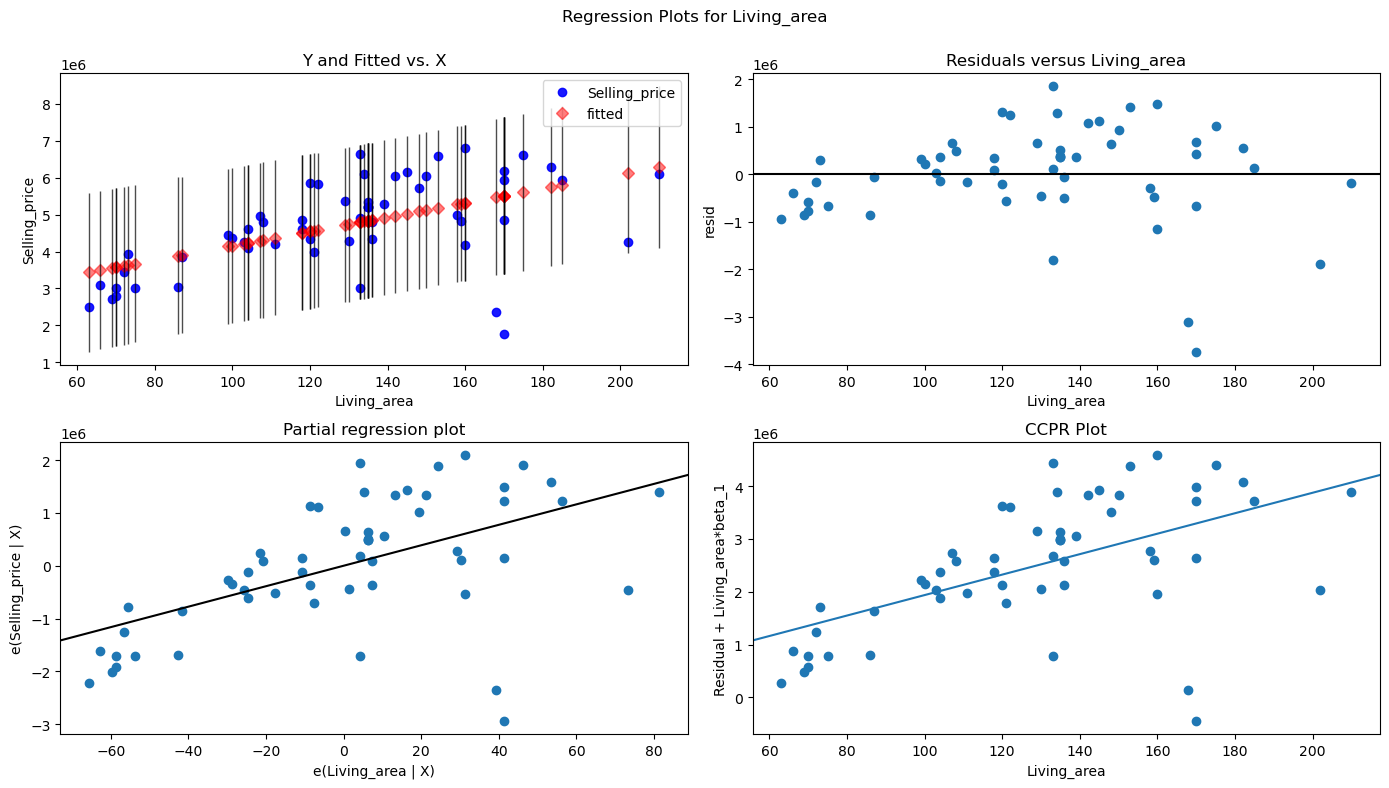

In [397]:
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(linear_model, 'Living_area', fig=fig)

### Problem 1e)

As we can see from the residual plot the line under fits the data. 
The model can be improved by taking into account the other parameters in the data that might have a correlation to the selling price. 

## Problem 2


In [398]:
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [399]:
# Load iris data and split train and test data
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

In [400]:
# Fit a logistic regression model on training data
logisticRegr = LogisticRegression(multi_class='ovr', solver='liblinear')
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)

### Problem 2a)

The confusion matrix for logistic regression is displayed below. 


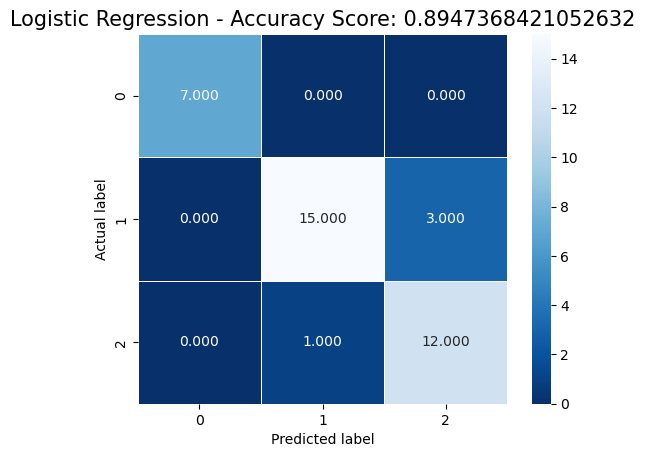

In [401]:
# Display confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Logistic Regression - Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show();

### Problem 2b)

K nearest neighbors classification has been fitted on the training data with different parameters as mentioned in the options variable below. 

The accuracy score and confusion matrix is displayed for each model. 

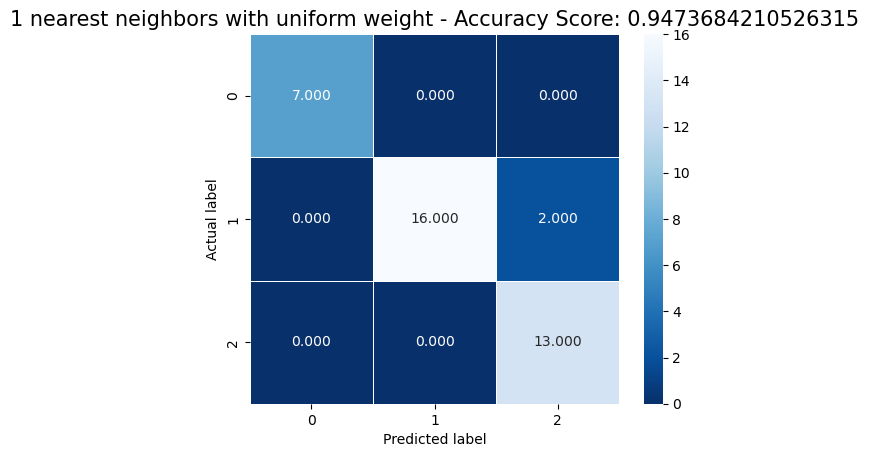

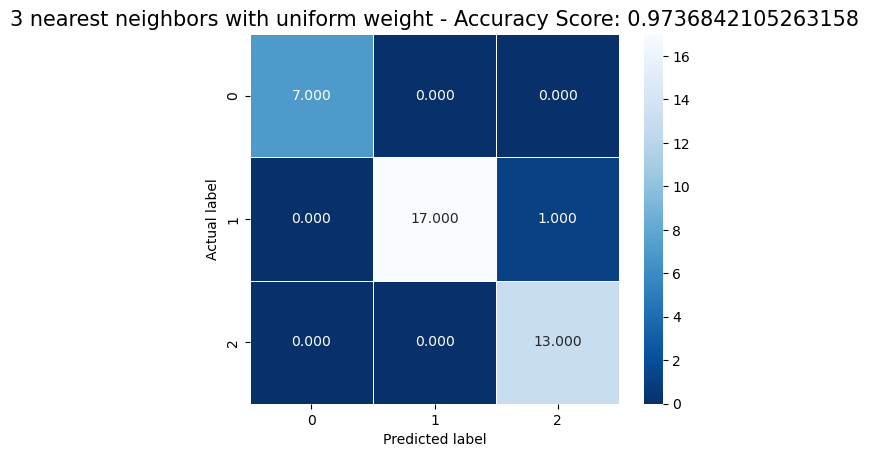

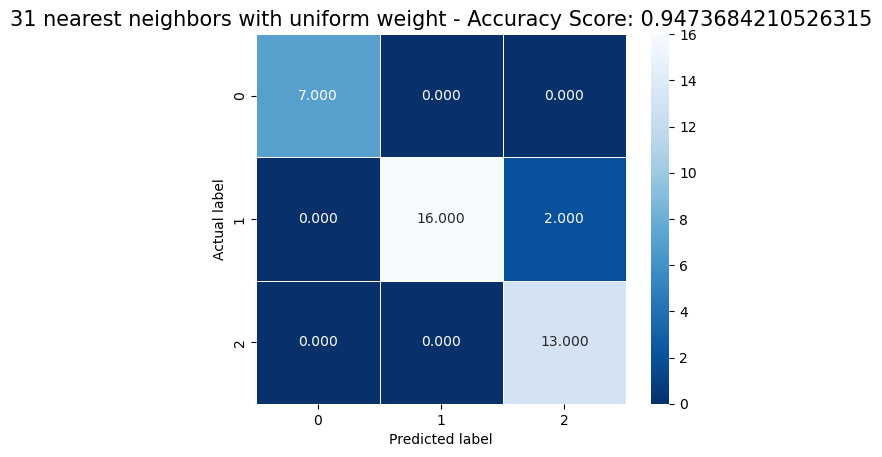

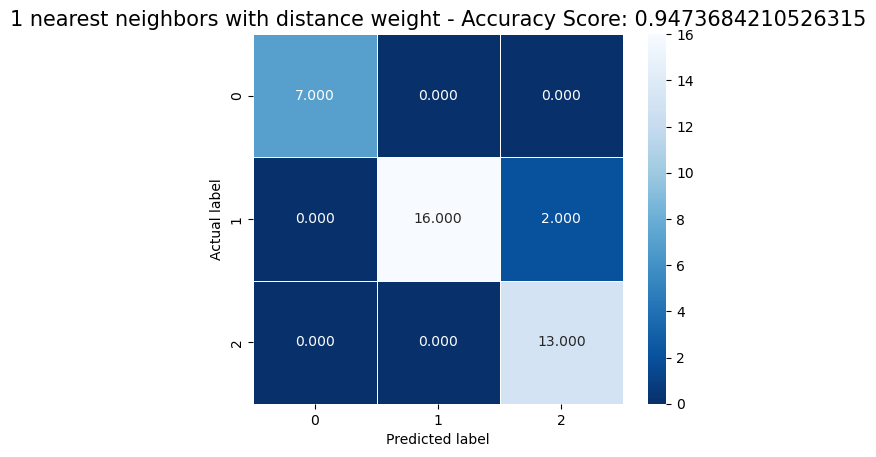

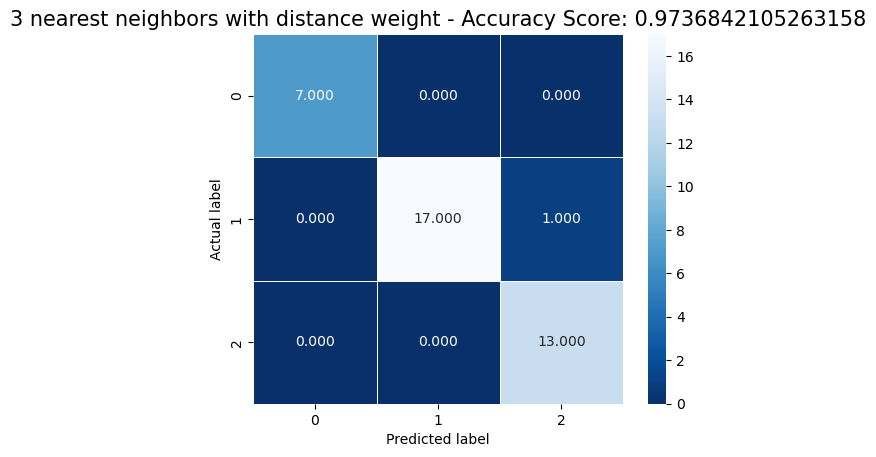

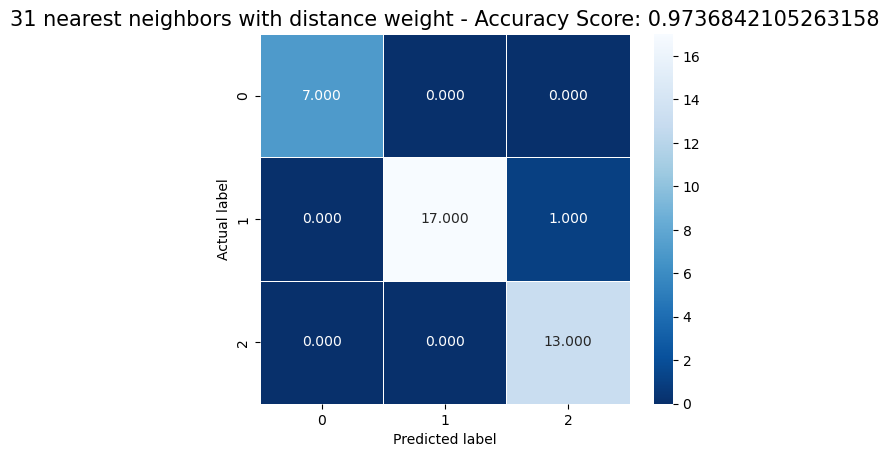

In [402]:
# Different types of K nearest neighbors models best trained and tested
options = [[1, 'uniform'], [3, 'uniform'], [31, 'uniform'], [1, 'distance'], [3, 'distance'], [31, 'distance']]

for option in options:
    knn = KNeighborsClassifier(n_neighbors=option[0], weights=option[1])
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    score = metrics.accuracy_score(y_test, predictions)
    cm = metrics.confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = '{0} nearest neighbors with {1} weight - Accuracy Score: {2}'.format(option[0], option[1], score)
    plt.title(all_sample_title, size = 15);
    plt.show();
    




With uniform weights, as we increase k beyond a certain limit the accuracy decreases. This is because the model is making predictions based on data points further away but it's actual distance from the prediction point is not being taken into account when using uniform weights. 

With distance based weights, as we increase k, the accuracy doesn't drop off after the limit but more or less stays the same since now the distance from the prediction point is taken into account. 

### Problem 2c)

The K nearest neighbors with any configuration produced better accuracy than logistic regression. 

## Problem 3

It's important to use a seperate test set because the model would already perform well on the training data as it's the data based on which the model was trained. Using a seperate test set on which the model wasn't trained gives us an idea of how well the model actually performs by seeing the difference between the actual output and the output calculated by the model. 